### 1. Evaluasi Model Klasifikasi

Dalam tahap evaluasi model, digunakan beberapa **metode pengukuran performa** untuk menilai seberapa baik model dalam memprediksi kelas target.

---

#### a. **Confusion Matrix**
Confusion Matrix menunjukkan **perbandingan antara hasil prediksi model dan nilai sebenarnya**.  
Tabel ini menampilkan jumlah:
- **True Positive (TP)** → Prediksi benar sebagai positif  
- **True Negative (TN)** → Prediksi benar sebagai negatif  
- **False Positive (FP)** → Prediksi salah sebagai positif  
- **False Negative (FN)** → Prediksi salah sebagai negatif  

Dari matriks ini, kita bisa memahami kesalahan model secara detail.

---

#### b. **Accuracy, Precision, Recall, dan F1-Score**
Beberapa metrik umum yang dihitung dari confusion matrix:
- **Accuracy** → Seberapa banyak prediksi yang benar dari seluruh data.  
- **Precision** → Dari semua prediksi positif, berapa yang benar-benar positif.  
- **Recall (Sensitivity)** → Dari semua data positif sebenarnya, berapa yang berhasil diprediksi dengan benar. 
- **F1-Score** → Rata-rata harmonik antara Precision dan Recall.  


---

#### c. **ROC Curve dan AUC (Area Under Curve)**
ROC Curve digunakan untuk **menilai kemampuan model membedakan antara kelas positif dan negatif**.

- Sumbu **X**: False Positive Rate (FPR)  
- Sumbu **Y**: True Positive Rate (TPR / Recall)  
- Semakin mendekati sudut kiri atas, semakin baik performa model.  
- Nilai **AUC** (Area Under Curve) mengukur luas area di bawah kurva:
  - AUC = 1 → Model sempurna  
  - AUC = 0.5 → Model acak (tidak lebih baik dari tebak-tebakan)

---


1. Imports




In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay


2. Load Data and Models

In [3]:
df = pd.read_csv('student_preprocessed.csv')

# Classification
clf = joblib.load('decision_tree_classifier.joblib')

# Regression
reg = joblib.load('decision_tree_regressor.joblib')

print('Dataset shape:', df.shape)


Dataset shape: (649, 60)


3. Prepare Data

In [4]:
# Classification
X_clf = df.drop(columns=['pass', 'G1', 'G2', 'G3'])
y_clf = df['pass']

# Regression
X_reg = df.drop(columns=['G3', 'pass'])
y_reg = df['G3']


4. Classification Decision Tree Visualization

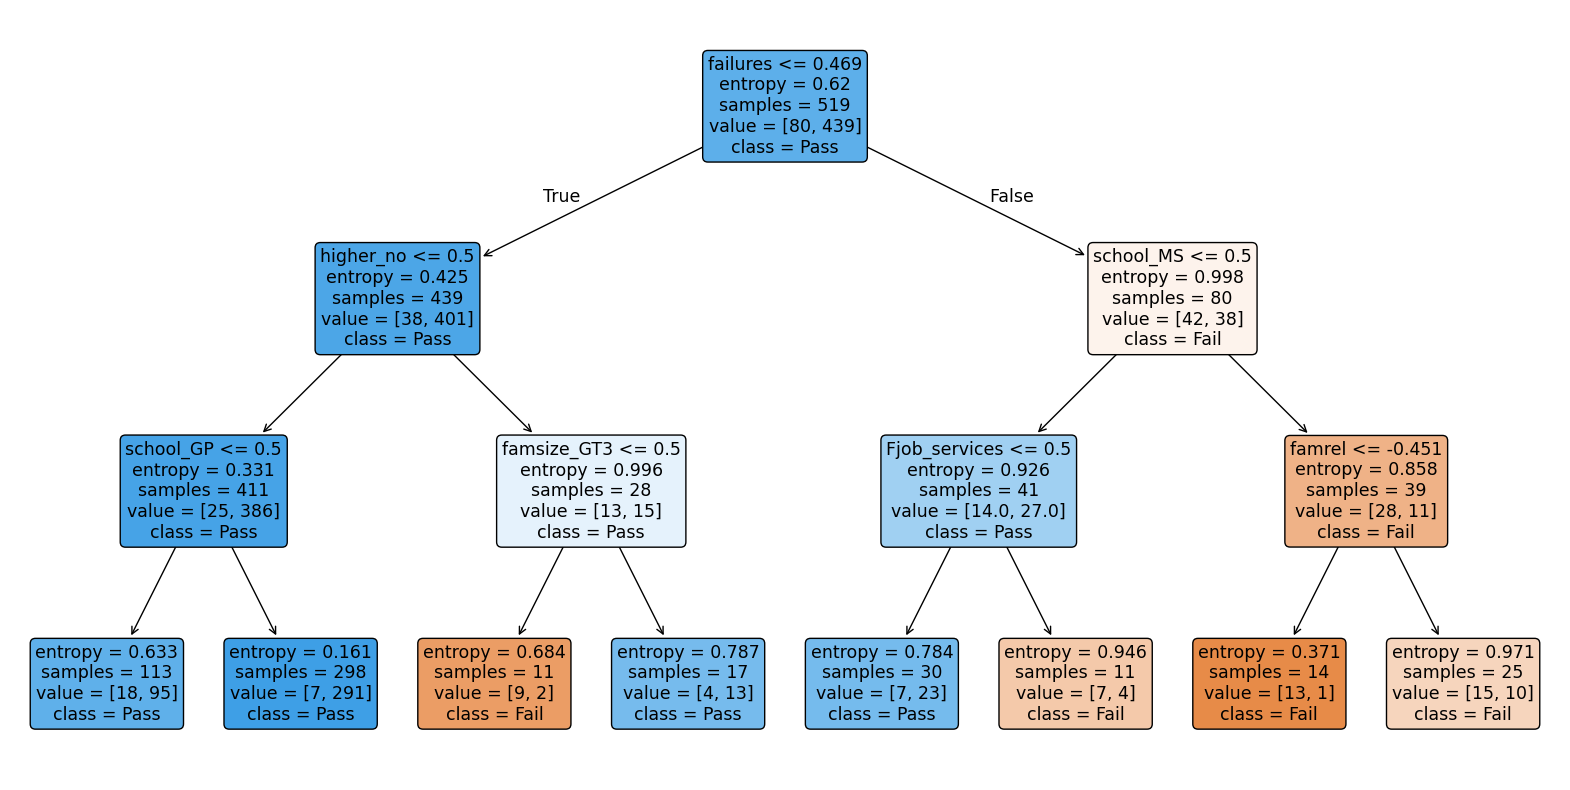

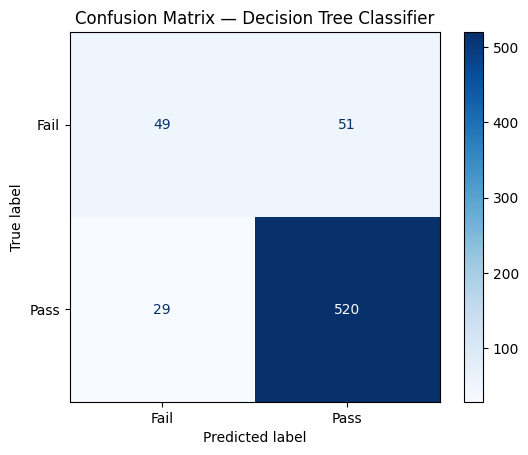

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    max_depth=3,
    feature_names=X_clf.columns.tolist(),  # ← FIX
    class_names=['Fail', 'Pass'],
    filled=True,
    rounded=True
)
plt.show()

ConfusionMatrixDisplay.from_estimator(
    clf,
    X_clf,
    y_clf,
    display_labels=['Fail', 'Pass'],
    cmap='Blues'
)
plt.title("Confusion Matrix — Decision Tree Classifier")
plt.show()



5. Regression Decision Tree Visualization

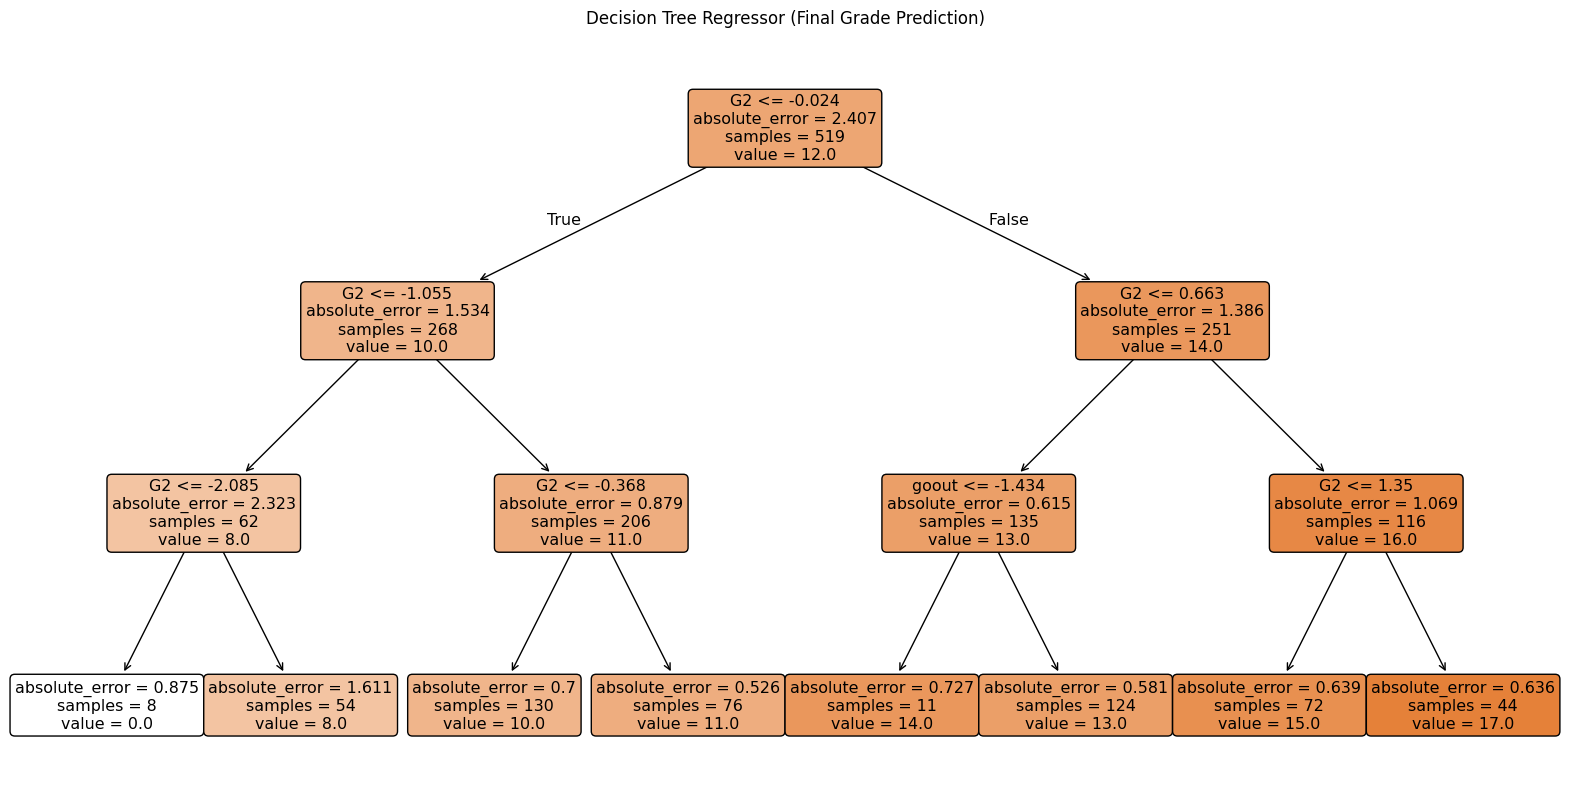

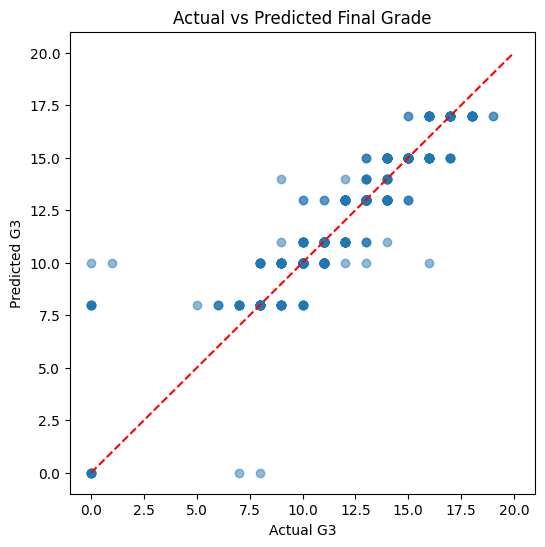

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(
    reg,
    max_depth=3,
    feature_names=X_reg.columns.tolist(),  # ✅ FIX
    filled=True,
    rounded=True
)
plt.title("Decision Tree Regressor (Final Grade Prediction)")
plt.show()


y_pred = reg.predict(X_reg)

plt.figure(figsize=(6, 6))
plt.scatter(y_reg, y_pred, alpha=0.5)
plt.plot([0, 20], [0, 20], 'r--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grade")
plt.show()

